In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import gdown

In [3]:
PATH_IMG = Path('PlantVillage/')

In [5]:
bs = 64 # batch_size

In [25]:
img_data = ImageDataBunch.from_folder(path=PATH_IMG, train='train', valid='val', ds_tfms=get_transforms(), size=224, bs=bs)

In [26]:
img_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (44016 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
Path: PlantVillage;

Valid: LabelList (11004 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
Path: PlantVillage;

Test: None

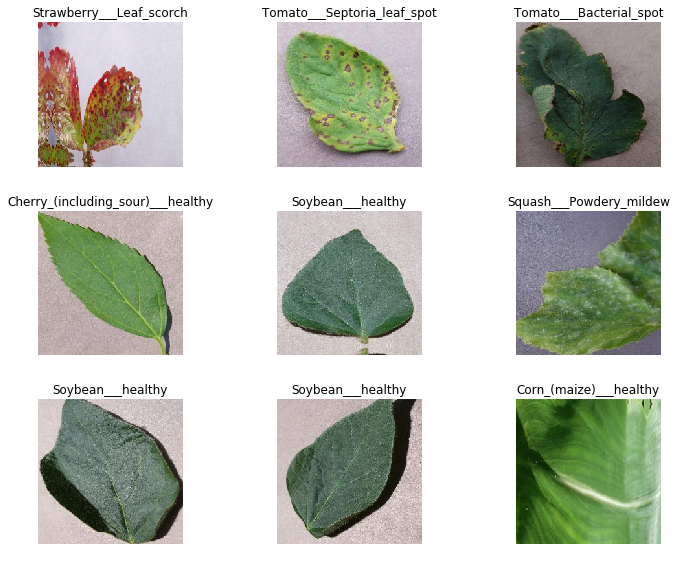

In [27]:
img_data.show_batch(rows=3, figsize=(10,8))

In [28]:
img_data.c

39

In [29]:
img_data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [30]:
model = cnn_learner(img_data, models.resnet34, metrics=[accuracy, error_rate])

In [31]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.275081,0.137157,0.956834,0.043166,03:43
1,0.146267,0.064265,0.978372,0.021628,03:28
2,0.097072,0.037028,0.987368,0.012632,03:28
3,0.060917,0.027360,0.990549,0.009451,03:27
4,0.042702,0.025219,0.991094,0.008906,03:28


In [32]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.067196,0.033519,0.989004,0.010996,03:27
1,0.041814,0.024897,0.992003,0.007997,03:28


In [33]:
model.save('train_7_cycles')

In [34]:
interpret = ClassificationInterpretation.from_learner(model)

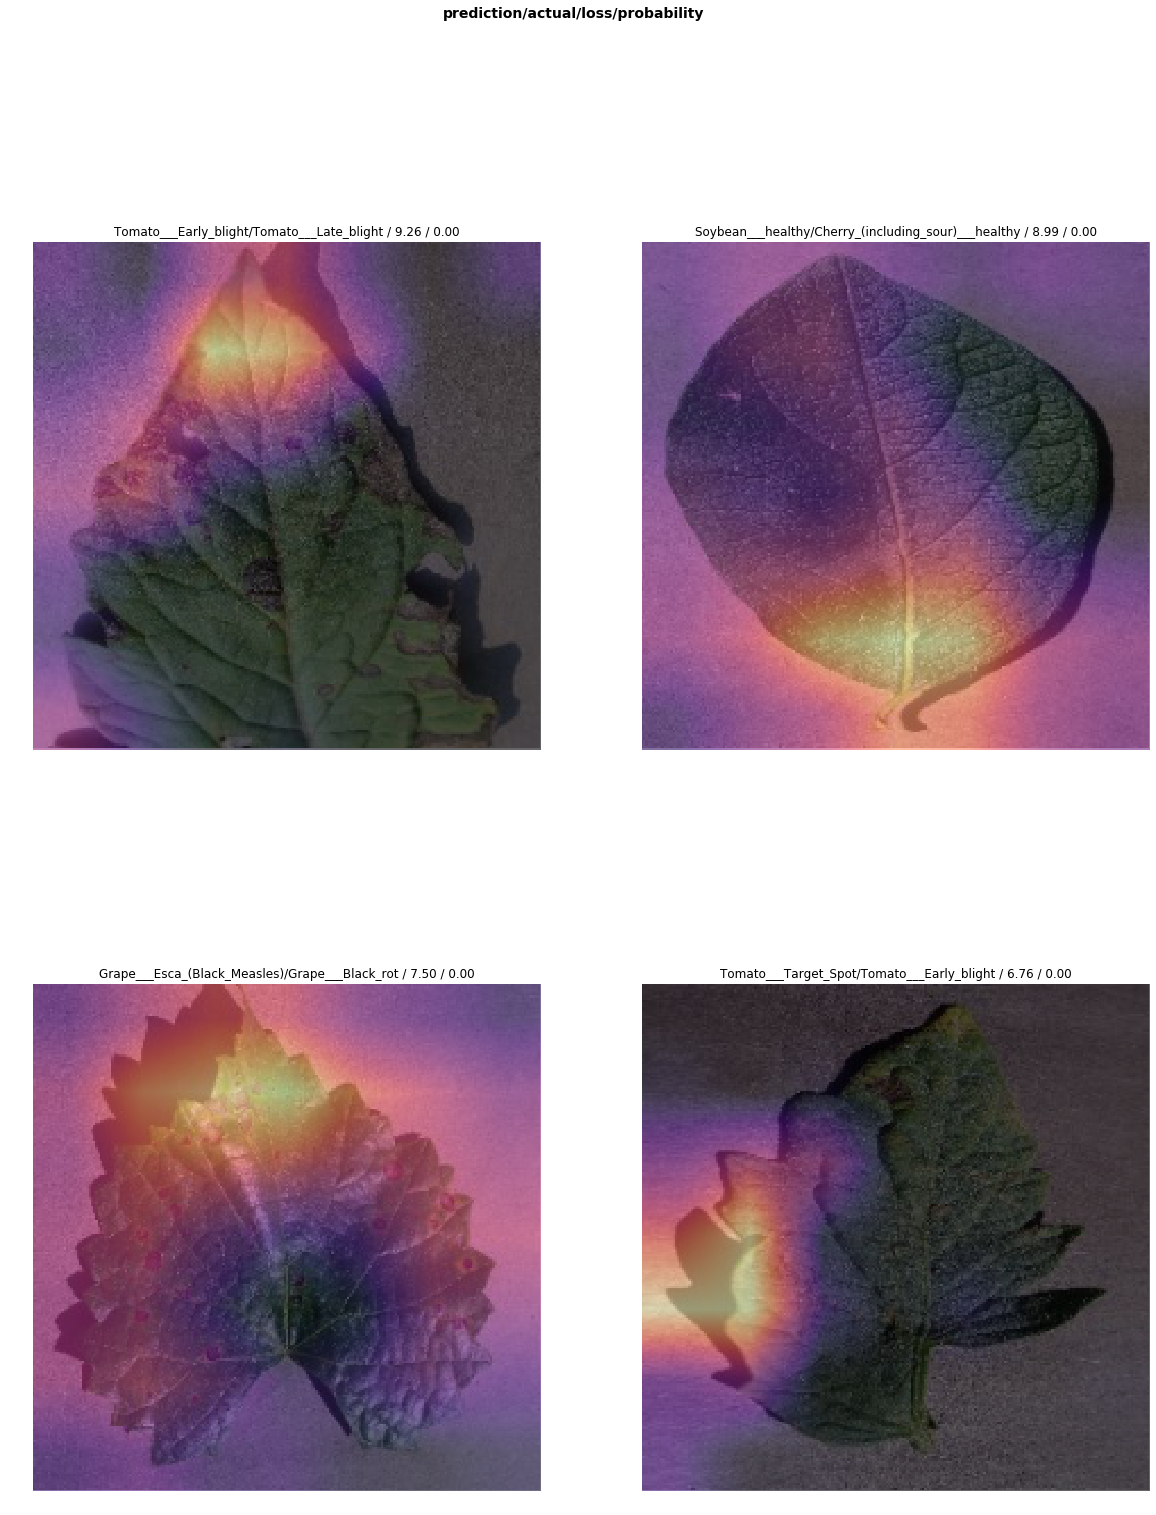

In [36]:
interpret.plot_top_losses(4, figsize=(20, 25))

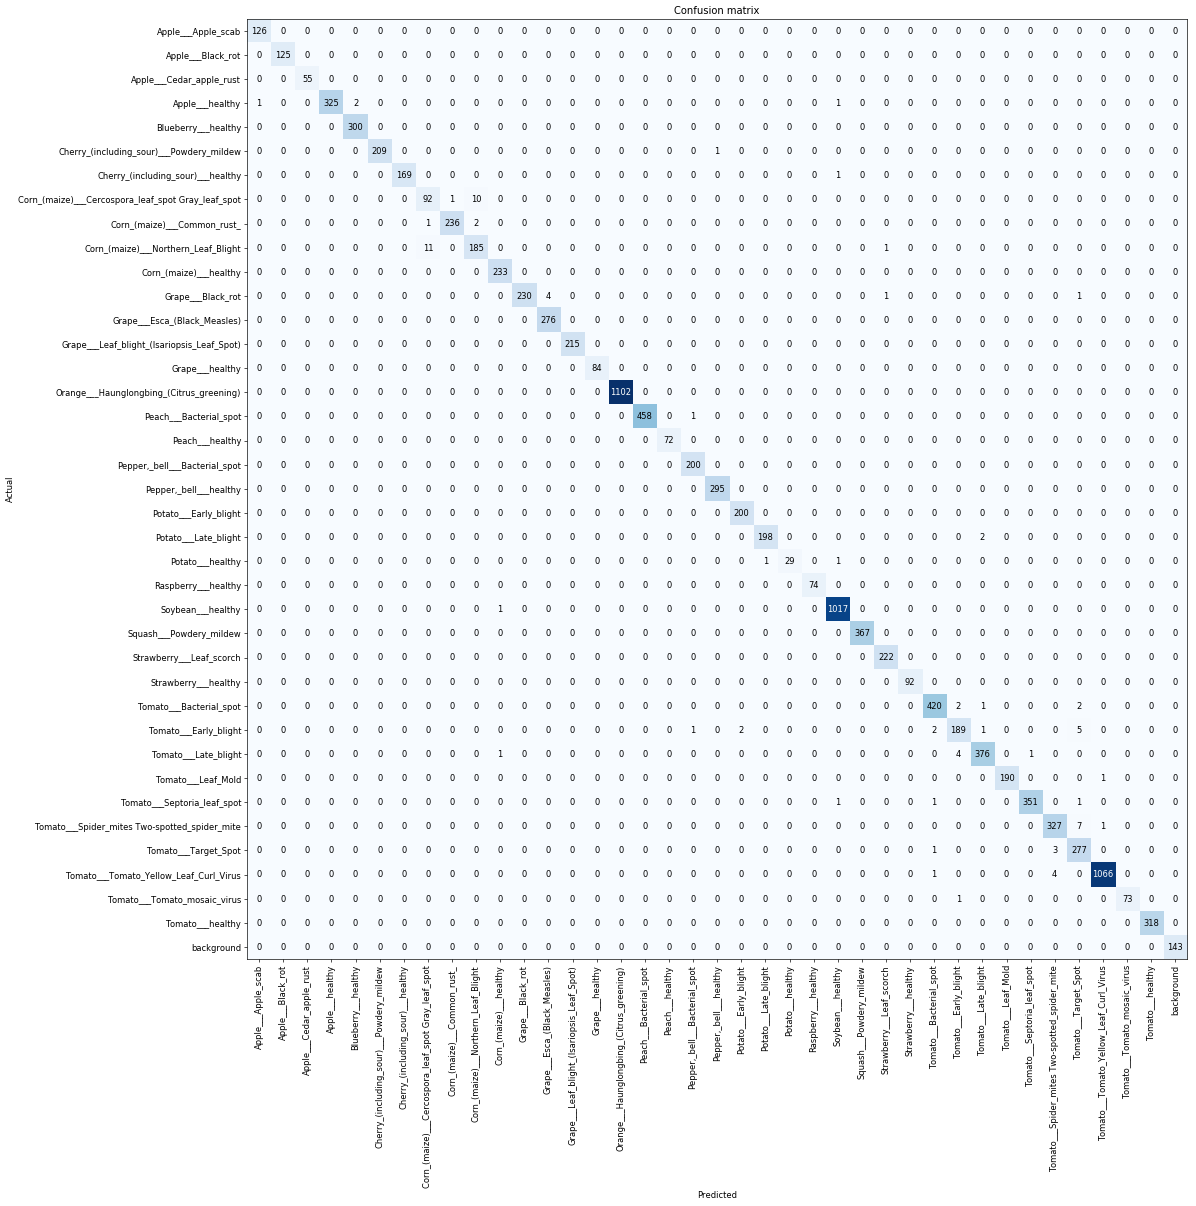

In [37]:
interpret.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [38]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


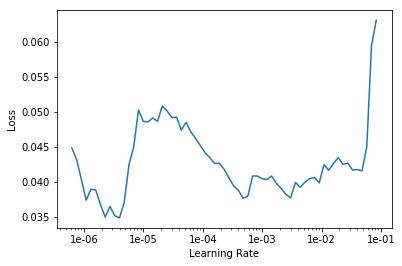

In [39]:
model.recorder.plot()

In [41]:
model.unfreeze()
model.fit_one_cycle(3, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.347306,0.843974,0.800527,0.199473,04:36
1,0.131069,0.062115,0.978644,0.021356,04:37
2,0.038473,0.020997,0.993457,0.006543,04:37


In [43]:
model.fit_one_cycle(5, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.124815,0.142209,0.957197,0.042803,04:37
1,0.144097,0.150233,0.959924,0.040076,04:37
2,0.093149,0.058316,0.981461,0.018539,04:36
3,0.041538,0.019202,0.995093,0.004907,04:36
4,0.018872,0.013773,0.996365,0.003635,04:36


In [44]:
model.save('train_lr_8_cycles')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


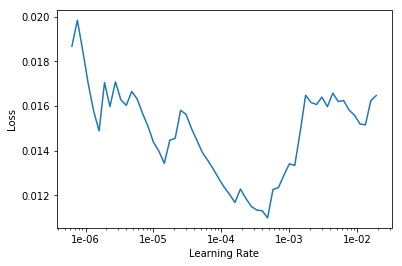

In [45]:
model.freeze()
model.lr_find()
model.recorder.plot()

In [47]:
lr = 1e-3/2
model.fit_one_cycle(2, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.018528,0.014205,0.996274,0.003726,03:25
1,0.016184,0.013566,0.996547,0.003453,03:26


In [48]:
model.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.020793,0.013504,0.996092,0.003908,03:26
1,0.021284,0.013225,0.996547,0.003453,03:27
2,0.011413,0.013450,0.996547,0.003453,03:27


In [49]:
model.save('train_final5_cycles')

In [50]:
model.load('train_final5_cycles')

Learner(data=ImageDataBunch;

Train: LabelList (44016 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
Path: PlantVillage;

Valid: LabelList (11004 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
Path: PlantVillage;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [51]:
model.export('export_resnet34_model.pkl')